# **Aim : Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.**

Problem Statement : Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’. As a business manager, try to find out the weak areas where you can work to make more profit.

Data Source : https://bit.ly/3i4rbWl

<h1 style="background-color:DodgerBlue;">Importing Necessary Libraries</h1>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<h1 style="background-color:MediumSeaGreen;">Reading data from the dataset</h1>

In [23]:
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [24]:
data.shape #Checking the shape of the dataset

(9994, 13)

In [63]:
data.columns #Column names present in the dataset

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [27]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [30]:
#Checking for null values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

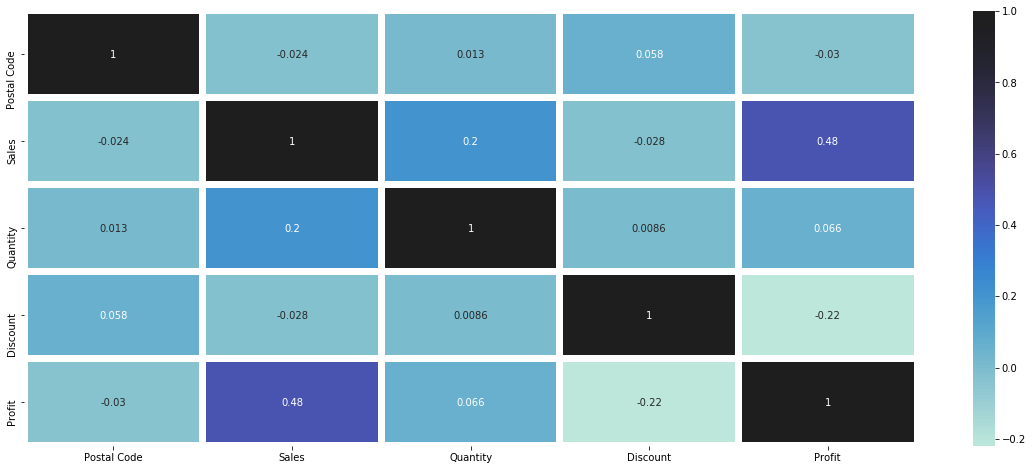

In [64]:
#Plotting a correlation matrix

f,ax = plt.subplots(figsize =(20,8))
sns.heatmap(data.corr(method='pearson'), annot=True,center=1, lw =6, linecolor='white')

<h1 style="background-color:SlateBlue;"> Data Visualization of the attributes present </h1>

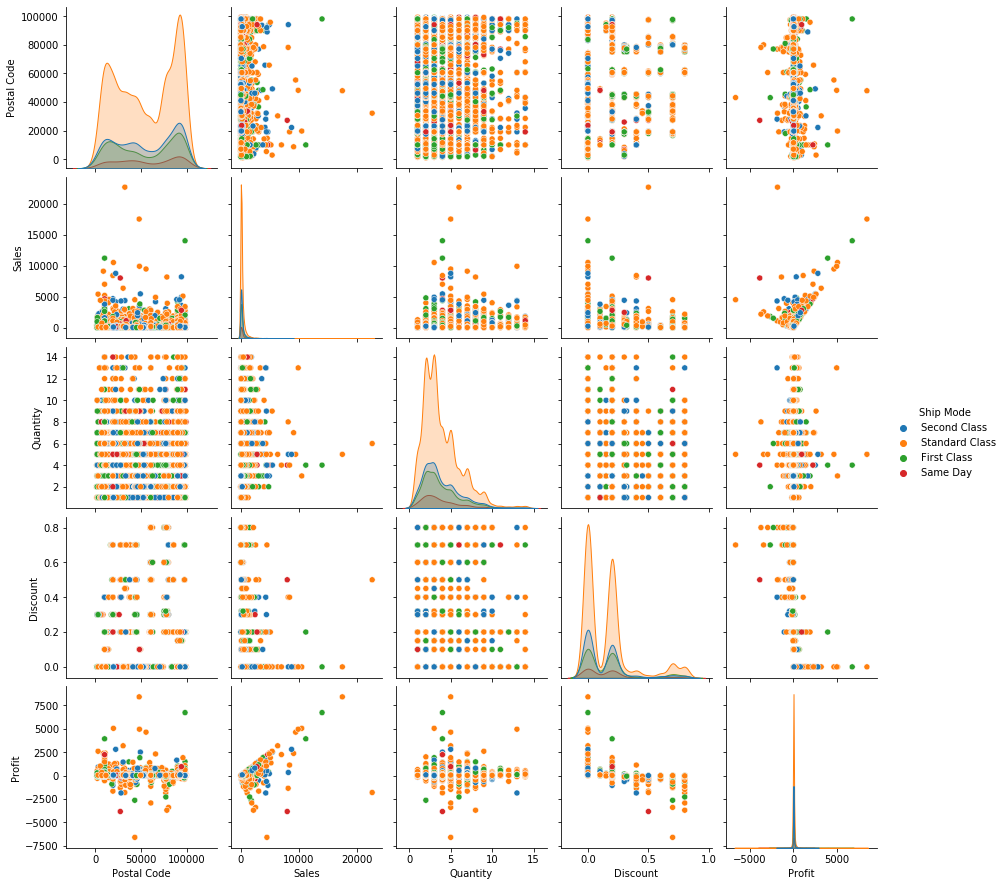

In [21]:
sns.pairplot(data,hue ='Ship Mode')

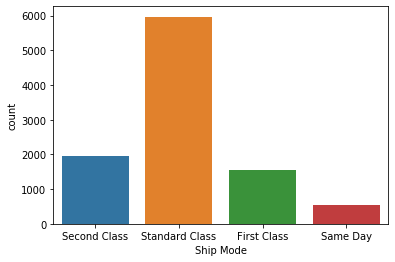

In [33]:
sns.countplot(x=data['Ship Mode'])

**From the graph we get the information that Standard class is the most preferred ship mode by the customers.**

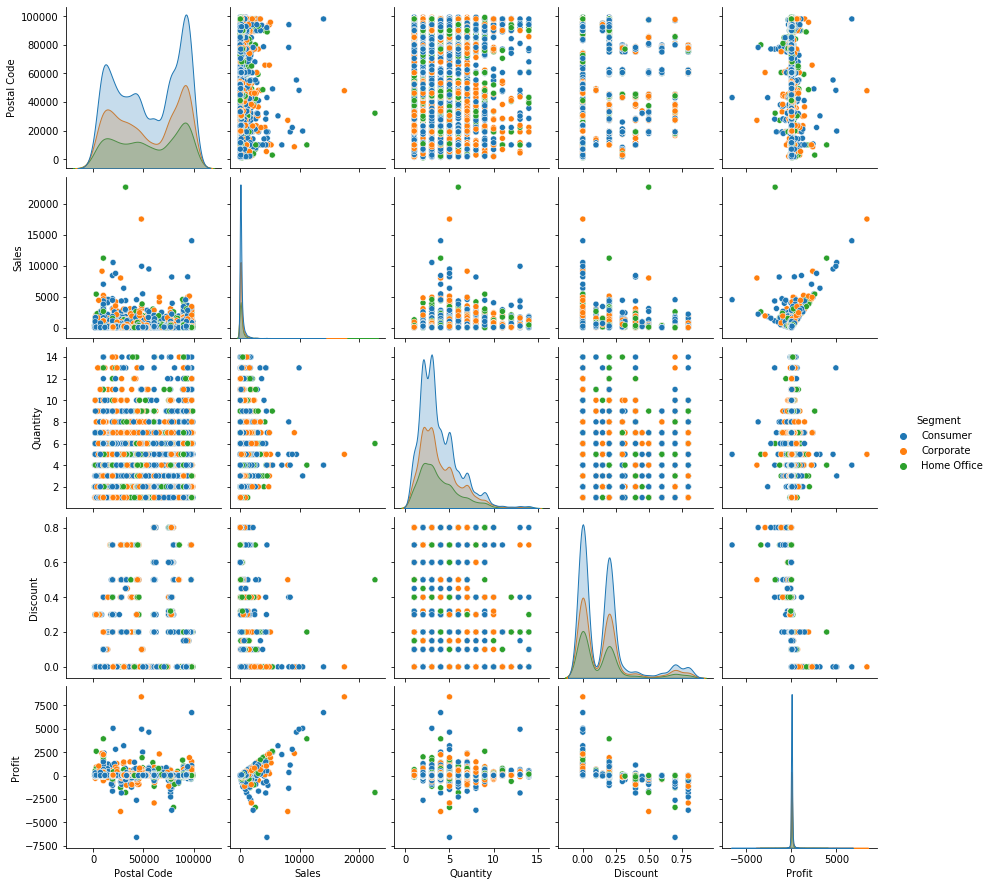

In [35]:
sns.pairplot(data,hue ='Segment')

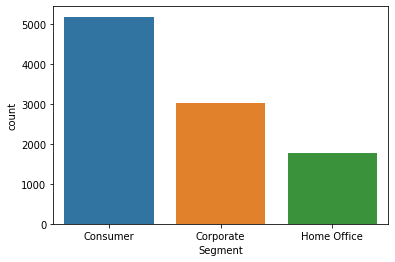

In [41]:
sns.countplot(x=data['Segment'])

**From the above graph we get a conclusion that number of normal consumers are more in number when compared to Corporate segment & Home Office.**

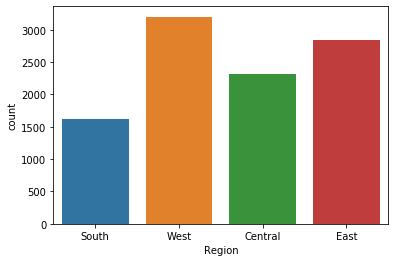

In [62]:
sns.countplot(x = data['Region'])

**West region has the highest customer count, whereas South region has the least customer count among the regions.**

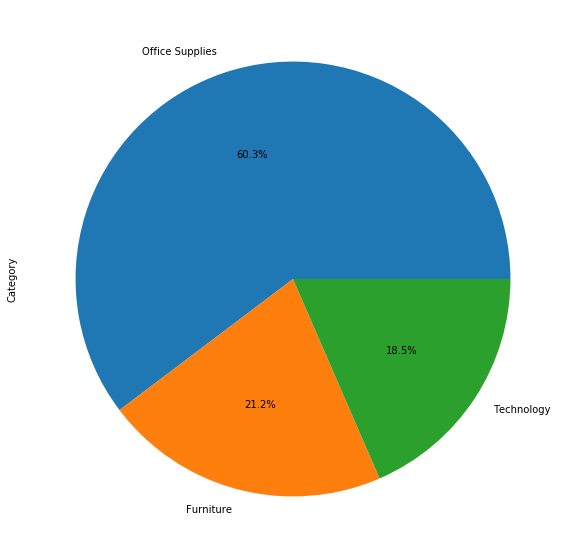

In [44]:
plt.figure(figsize=(20,10))
data['Category'].value_counts().plot.pie(autopct= '%3.1f%%')
plt.show()

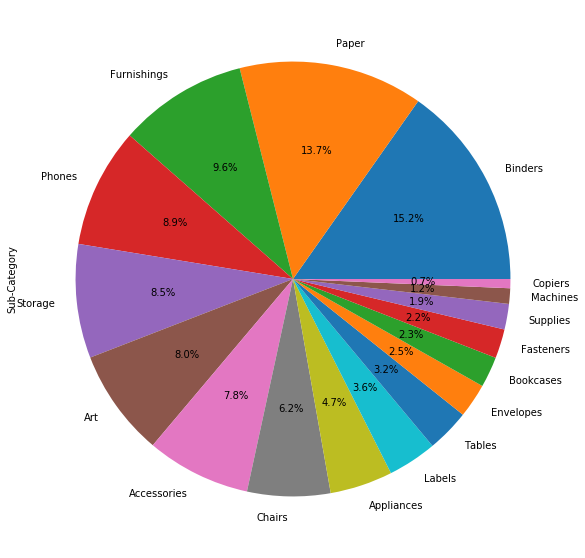

In [45]:
plt.figure(figsize=(20,10))
data['Sub-Category'].value_counts().plot.pie(autopct= '%3.1f%%')
plt.show()

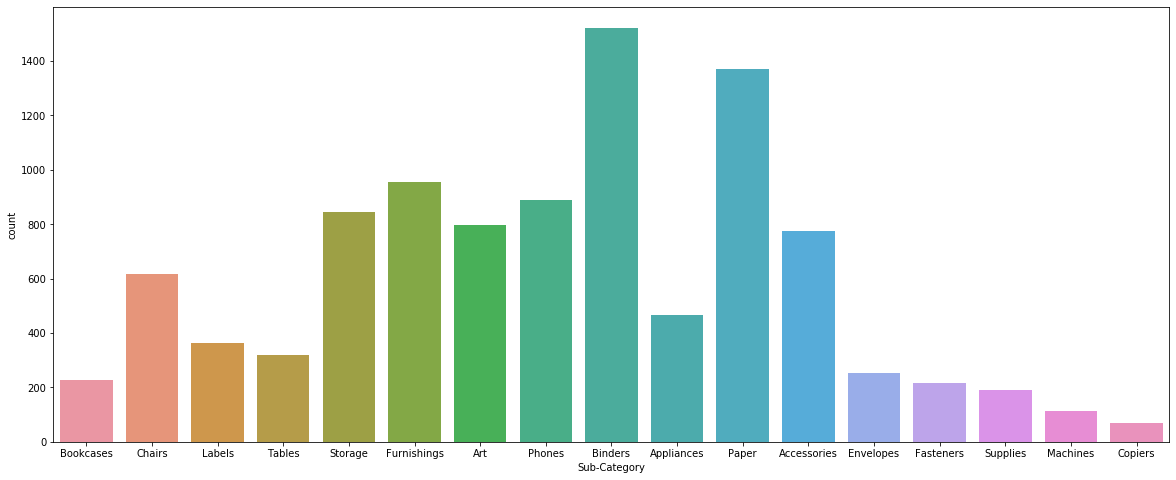

In [48]:
plt.figure(figsize=(20,8))
sns.countplot(x=data['Sub-Category'])
plt.show()

**Top Sub-Categories:**
- Binders
- Paper
- Furnishing
- Phones
- Storage
- Accessories
- Art
- Chairs
- Appliances

**Bottom Sub-Categories:**
- Copiers
- Machines
- Supplies
- Fasteners
- Bookcases
- Envelopes
- Tables
- Labels


Text(-2.450000000000003, 0.5, 'Quantities ordered')

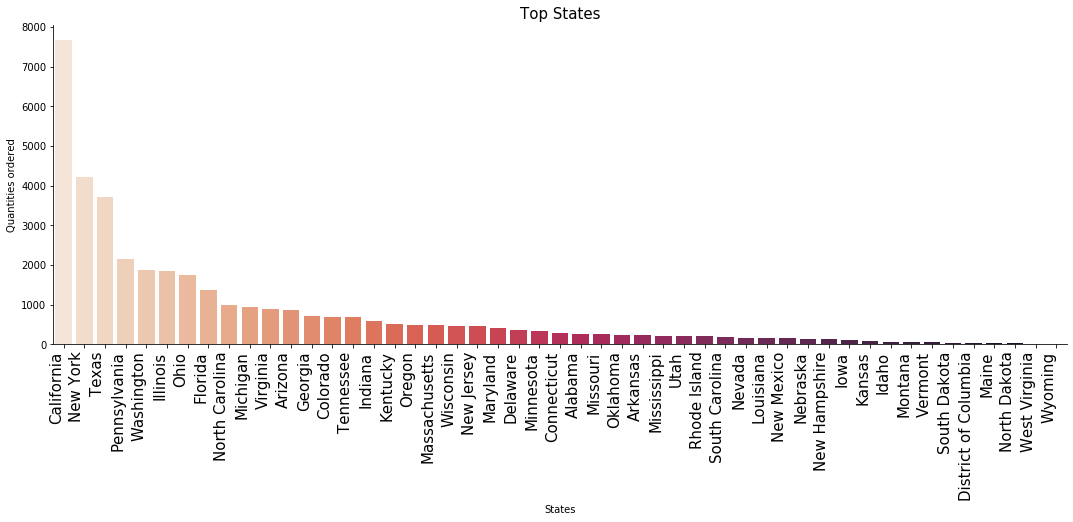

In [50]:
## Observing states according to the quantity ordered.
top_states = data.groupby('State')['Quantity'].sum().reset_index().sort_values(by = 'Quantity', ascending = False)
sns.catplot(x = 'State', y = 'Quantity', data = top_states, kind = 'bar', palette = 'rocket_r', aspect = 3)
plt.title('Top States', fontsize = 15)
plt.xticks(rotation = 90, ha = 'right', fontsize = 15)
plt.yticks(fontsize = 10)
plt.xlabel('States', fontsize = 10)
plt.ylabel('Quantities ordered', fontsize = 10)

**Top-selling States:**
- California
- New York
- Texas
- Pennsylvania
- Washington

**States with least quantities ordered:**
- Wyoming
- West Virginia
- North Dakota
- Maine
- District of Columbia

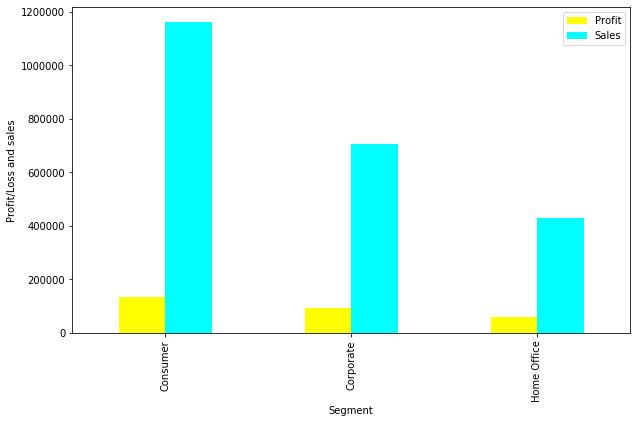

In [53]:
data.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['yellow','cyan'],figsize=(10,6))
plt.ylabel('Profit/Loss and sales')
plt.show()

**From the graph, we can see that the sales and profit are more in Consumer segment when compared to corporate & home office segments.**

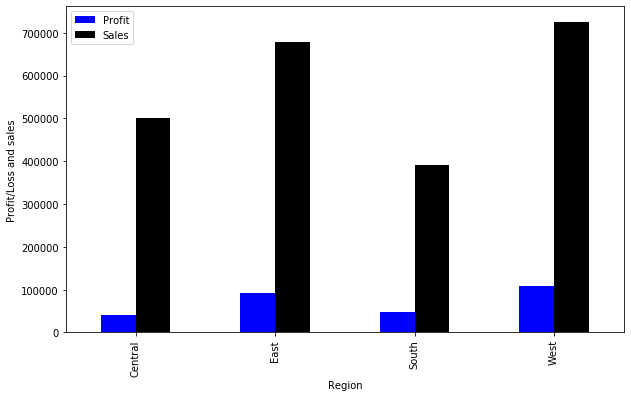

In [55]:
data.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['blue','black'],figsize=(10,6))
plt.ylabel('Profit/Loss and sales')
plt.show()

Text(0.5, 1.0, 'Average profit divided between different regions')

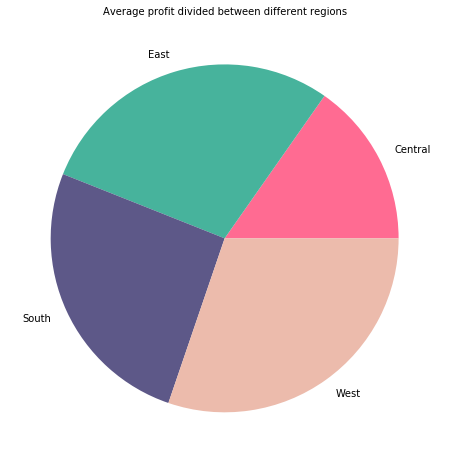

In [56]:
df_region = data.groupby('Region')['Profit'].mean().reset_index()
plt.figure(figsize = (20,8))
plt.pie(df_region['Profit'], labels = df_region['Region'].unique(), startangle=0,
        colors = ['#ff6B92', '#47B39C', '#5D5888', '#ECBBAC'])
plt.title('Avg. profit divided between different regions', fontsize = 10)

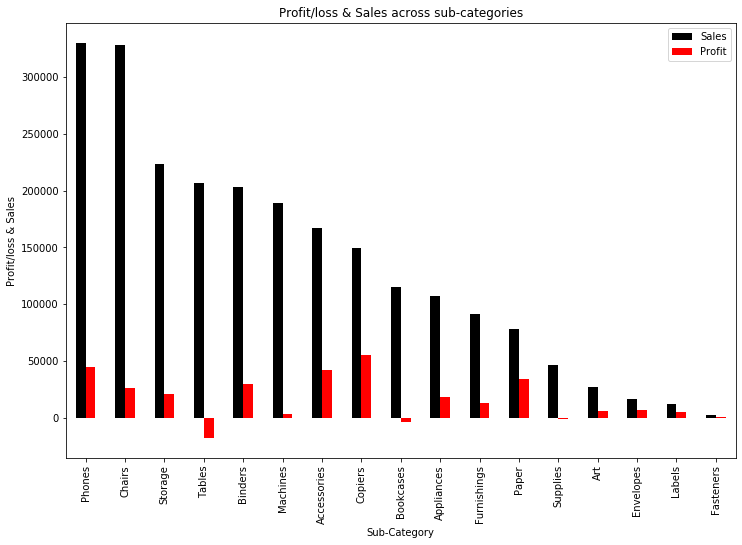

In [60]:
ps = data.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['black','red'],figsize=(12,8))
plt.title('Profit/loss & Sales across sub-categories')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

- Phones & chairs are having an high profit-sales rate but phones have high profit than chairs.
- Despite being a bottom sub-category 'Copiers' have a good profit-sales rate.
- Sub-categories like 'Tables', 'Bookcases', 'Supplies' are facing a loss.

***From the above Exploratory Data Analysis we derived some conclusions that:***
- We can make more advertising & discount strategies for sub-categories like Art, Envelopes, Labels, Fasteners so as to attract customers as these are some of the least ordered sub-categories.
- South region is the least shipped region. We can imporve by using marketing strategies like advertisements & discounts to attract customer attention & increase the sales in the region.
- Sub-categories like Copiers, Machines, Supplies, Fasteners, Bookcases, Envelopes, Tables, Labels are less-ordered. So, we can make some discount/sale strategies for the same.
- The least preferred shipping modes are Same Day and First Class modes. We can create a survey regarding the issues that they are facing & work upon those points so as to increase interaction with the customers and resolve those problems.
- Sub-categories like 'Tables', 'Bookcases', 'Supplies' are facing a loss. So we can make a strategy of selling these items to the customers by making them sell in combinations.
    - For example, we can make a strategy named "Study Bonaza Offer!!" which will consist sub-categories like Tables, Chairs, Bookcases, other study materials. We can give them an additional discount on purchasing the entire combination.
    - For items like Supplies we can do the same by making a combo offer which includes important supplies goods.